In [2]:
import dill
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.transforms as transforms
import numpy as np

%run "..//JM_custom_figs.py"

C:\Github\Distraction-Paper\JM_custom_figs.py:11: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [3]:
datafolder = "C:\\Github\\Distraction-Paper\\data\\"
figfolder = "C:\\Github\\Distraction-Paper\\figs\\"

try:
    pickle_in = open(datafolder + "distraction_data_only_snips.pickle", 'rb')
except FileNotFoundError:
        print('Cannot access pickled file')

[modDict, disDict, habDict] = dill.load(pickle_in)

In [3]:
for day in [modDict, disDict, habDict]:
    rats = day.keys()
    for rat in rats:
        d = day[rat]
        # check that numbers add up
        d ['#ds'] =len(d['distractors'])
        d ['#distracted'] =len(d['distracted'])
        d ['#not-dis'] =len(d['notdistracted'])   
        if d['#not-dis'] + d['#distracted'] == d['#ds']:
            d['prob-distracted'] = d['#distracted'] / d['#ds']
        else:
            print("Something wrong in the number of distracted and non-distracted trials")


In [4]:
probdisMod, probdisDis, probdisHab = [], [], []
for day, output in zip([modDict, disDict, habDict],
                      [probdisMod, probdisDis, probdisHab]):
    rats = day.keys()
    for rat in rats:
        d = day[rat]
        output.append(d['prob-distracted'])

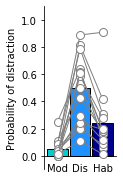

In [5]:
colors = ['darkturquoise','dodgerblue', 'darkblue']

f, ax = plt.subplots(figsize=(2,3))
f.subplots_adjust(left=0.4)
barscatter([probdisMod, probdisDis, probdisHab], paired=True,
           barfacecolor=colors, barfacecoloroption='individual',
           ax=ax)

ax.set_ylabel('Probability of distraction')
ax.set_xticks([1,2,3])
ax.set_xticklabels(['Mod', 'Dis', 'Hab'])
ax.set_ylim([-0.1, 1.1])

f.savefig(figfolder+"fig2_probability of distraction.pdf")

In [6]:
def distractionrasterFig(ax, timelock, events,
                         pre = 1, post = 1,
                         sortevents=None, sortdirection='ascending',
                         title=''):

    if sortevents != None:
        if len(timelock) != len(sortevents):
            print('Length of sort events does not match timelock events; no sorting')

        if len(timelock) == (len(sortevents) + 1):
            sortevents.append(0)
            
            if sortdirection == 'ascending':
                sortOrder = np.argsort(sortevents)
            else:
                sortOrder = np.argsort(sortevents)[::-1]
                
            timelock = [timelock[i] for i in sortOrder]    
        else:
            if sortdirection == 'ascending':
                sortOrder = np.argsort(sortevents)
            else:
                sortOrder = np.argsort(sortevents)[::-1]
                
            timelock = [timelock[i] for i in sortOrder]
    
    rasterData = [[] for i in timelock]
    
    for i,x in enumerate(timelock):
        rasterData[i] = [j-x for j in events if (j > x-pre) & (j < x+post)]
 
    for ith, trial in enumerate(rasterData):

        xvals = [x for x in trial] 
        yvals = [1+ith] * len(xvals)
        
        pdplist = [lick for lick in xvals if lick > 0 and lick < 1]
        if len(pdplist) > 0:
            ax.scatter(xvals, yvals, marker=',', s=1, color='k')
        else:
            ax.scatter(xvals, yvals, marker=',', s=1, color='xkcd:light blue')
    
    ax.set_title(title)

In [7]:
def scalebar4raster(ax, length=1, offset=1, ypos=0):
    
    # Turns off bottom axis and x ticks
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])
    
    # Gets x coordinates for scale bar
    xmin=ax.get_xlim()[0]
    x0=xmin+offset
    x1=xmin+offset+length
    
    # Sets up a transform for x in data coords and y in axis coords
    trans = transforms.blended_transform_factory(
    ax.transData, ax.transAxes)

    # Plots line using x and y and transform
    line = mpl.lines.Line2D([x0, x1], [ypos, ypos], lw=2., color='k', transform=trans)
    line.set_clip_on(False)
    ax.add_line(line)
    
    # Adds text below line
    ax.text((x1-length/2), ypos-0.02, '{} s'.format(length), va='top', ha='center', transform=trans)
    
    # Adds triangle to show distractor
    ax.plot(0, 1., marker="v", markersize=6, color='grey', clip_on=False, transform=trans)

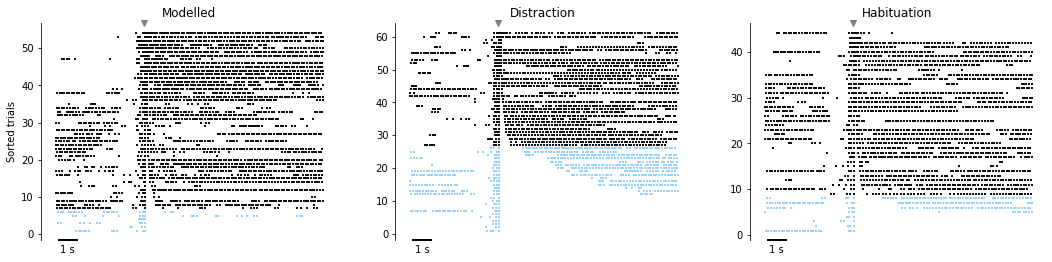

In [8]:
rat='thph1.4'

f, ax = plt.subplots(ncols=3, figsize=(18,4))

d=modDict[rat]
rasterPlot = distractionrasterFig(ax[0],
                                  d['distractors'],
                                  d['licks'],
                                  pre=5, post=10, sortevents=d['pdp'], sortdirection='dec',
                                  title='Modelled')

d=disDict[rat]
rasterPlot = distractionrasterFig(ax[1],
                                  d['distractors'],
                                  d['licks'],
                                  pre=5, post=10, sortevents=d['pdp'], sortdirection='dec',
                                  title='Distraction')

d=habDict[rat]
rasterPlot = distractionrasterFig(ax[2],
                                  d['distractors'],
                                  d['licks'],
                                  pre=5, post=10, sortevents=d['pdp'], sortdirection='dec',
                                  title='Habituation')

ax[0].set_ylabel('Sorted trials')

for axis in ax:
    #axis.set_xlabel('Time from distractor (s)')
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    scalebar4raster(axis)

f.savefig(figfolder+"fig2_raster plots.pdf")

In [9]:
# code to calculate average PDP on distraction day

long_pdps = []
avg_long_pdps = []

rats = day.keys()
for rat in rats:
    d=disDict[rat]
    pdps = [pdp for pdp, L in zip(d['pdp'], d['d_bool_array']) if L]
    long_pdps.append(pdps)
    avg_long_pdps.append(np.mean(pdps))
    
    



In [10]:
avg_long_pdps

[26.80658269658538,
 22.59749770491803,
 92.06218751999998,
 28.744877292307688,
 34.731263512380984,
 14.806735725714296,
 15.369972394666679,
 212.79590399999995,
 72.26436095999998,
 23.78252288000003,
 90.34890752,
 32.32661007515151,
 34.68272786285714]

In [6]:
# code to work out if pre_dp is different on distracted and distraction trials
mean_pre_dp = []

rats = disDict.keys()
for rat in rats:
    d=disDict[rat]
    distracted_predp = np.mean([pre_dp for pre_dp, L in zip(d['pre_dp'], d['d_bool_array']) if L])
    notdistracted_predp = np.mean([pre_dp for pre_dp, L in zip(d['pre_dp'], d['d_bool_array']) if not L])
    mean_pre_dp.append([distracted_predp, notdistracted_predp])
#     pdps = [pdp for pdp, L in zip(d['pdp'], d['d_bool_array']) if L]
#     long_pdps.append(pdps)
#     avg_long_pdps.append(np.mean(pdps))

(<matplotlib.axes._subplots.AxesSubplot at 0x2619b415708>,
 [1, 2],
 [<BarContainer object of 1 artists>, <BarContainer object of 1 artists>],
 [[<matplotlib.lines.Line2D at 0x2619b44dd88>],
  [<matplotlib.lines.Line2D at 0x2619b76d848>]])

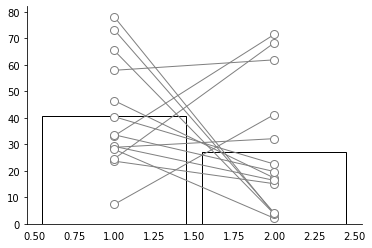

In [11]:
# mean_pre_dp
# plt.bar([1,2], [np.mean([dp[0] for dp in mean_pre_dp]), np.mean([dp[1] for dp in mean_pre_dp])])

data = [[dp[0] for dp in mean_pre_dp], [dp[1] for dp in mean_pre_dp]]

f, ax = plt.subplots()
barscatter(data, ax=ax, paired=True)